### Problem definition

* Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.


### Workflow for this notebook
1. problem definition
2. Wrangle, prepare, cleanse the data
2. EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data
3. Acquire training and testing data
4. Model, predict and solve the problem
5. Visualize, report, and present the problem solving steps and final solution


In [1]:
#required libs 

# linear algebra
import numpy as np 

#data frame
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read data 
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test.csv')

In [3]:
# combine data frame
df = pd.concat([df_train, df_test])

In [4]:
df.shape

(1309, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
df.Survived.unique()

array([ 0.,  1., nan])

In [10]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [11]:
# Mean of Age column
print('Mean of Age ',df['Age'].mean())
print('Median of Age ',df['Age'].median())
print('Mode of Age ',df['Age'].mode())

Mean of Age  29.881137667304014
Median of Age  28.0
Mode of Age  0    24.0
dtype: float64


**We have got mean as 29.69, median as 28.0 and mode as 24.0 for Age column. Since Age column has no outliers in it**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


1. Name, Ticket,  Cabin, PassengerId ... I will Drop these columns because they are of no use to me in this notebook
2. null for Survived  because this column is not on test data
3. I will fill nall of Age col. by mean 
4. I will convert Sex to cat, Embarked as categorical
5. convert Pclass, Survived to categorical
6. create a new column for combine two column SibSp, Parch and then drop it

## Cleaning Data

In [13]:
#Drop columns not used
df.drop(['Ticket','Cabin', 'Name' ], axis=1, inplace=True)

In [14]:
# Alternate way to fill null values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
#convert' Pclass' to category 
df.Pclass.replace({1:'Upper', 2:'Middle', 3:'Lower'}, inplace = True)

In [16]:
#check type of pclass
df.Pclass.dtype

dtype('O')

In [17]:
#checks nulls
df.Age.isnull().sum()

0

In [18]:
# Passed a dictionary to astype() function 
#df = df.astype({"Embarked":'category', "Age":'int64', 'Sex':'m', 'Pclass':'category', 'Survived':'category'})
  
# Now print the data type 
# of all columns after change
#df.info()

In [19]:
df.Survived.isnull().sum()

418

## Feature Engineer

In [20]:
#Combine two columns to one columns called Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'],axis=1 ,inplace=True)

#check
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0.0,Lower,male,22.0,7.2500,S,2
1,2,1.0,Upper,female,38.0,71.2833,C,2
2,3,1.0,Lower,female,26.0,7.9250,S,1
3,4,1.0,Upper,female,35.0,53.1000,S,2
4,5,0.0,Lower,male,35.0,8.0500,S,1


## EDA

C:\Users\Omnia Hosny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


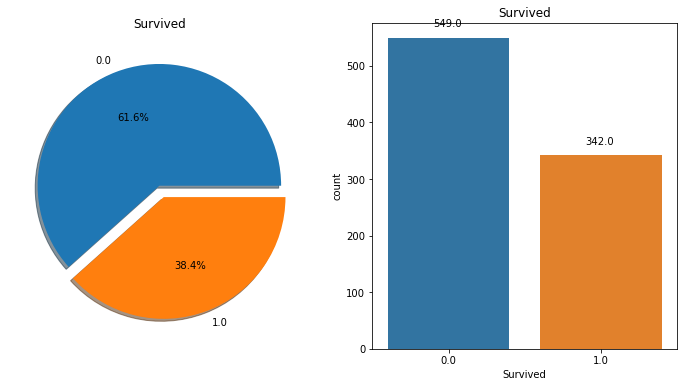

In [21]:

#Survived rate

#Pie Chart
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))


plt.show()

* The plots show that number of passengers survived the accident.
* Only 342 out of 891 passengers (38.4%) survived in the training set.


percentage male 31.871345029239766 %
percentage female 68.12865497076024 %


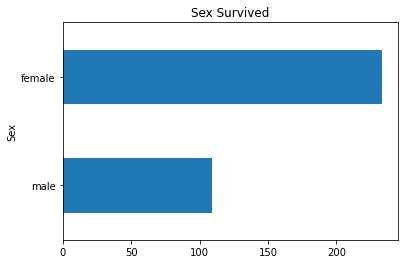

In [22]:
#visual Sex Survived
surviveBySex = df_train.groupby('Sex')['Survived'].sum()
surviveBySex.sort_values().plot(kind='barh')
plt.title('Sex Survived')

#Calculate percentage
dfSurviveBySex = pd.DataFrame(surviveBySex)
percentage_male = (dfSurviveBySex.Survived[1] /df.Survived.sum())*100
percentage_female =( dfSurviveBySex.Survived[0] /df.Survived.sum())*100

#prints Percentage 
print('percentage male {} %'.format(percentage_male) )
print('percentage female {} %'.format(percentage_female) )

* As we see female Survive by percentage (233) 68% however male by Survive by (109) 31%
#### Now I check if no. of female more than male 

percentage male 64.40030557677616 %
percentage female 35.59969442322384 %


Text(0.5, 1.0, 'Count Of Each Sex')

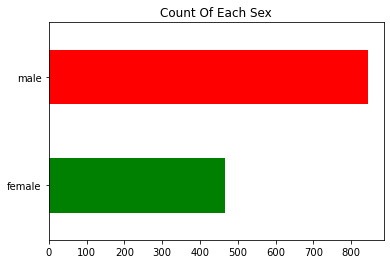

In [23]:
#Calculate percentage
df_Sex = pd.DataFrame(df.Sex.value_counts().sort_values())
percentage_female =( df_Sex.Sex[0] /df.Sex.count())*100
percentage_male = (df_Sex.Sex[1] /df.Sex.count())*100

#prints Percentage 
print('percentage male {} %'.format(percentage_male) )
print('percentage female {} %'.format(percentage_female) )

#visualize count of Each sex 
df.Sex.value_counts().sort_values().plot(kind='barh', color = ['green', 'red'])
plt.title('Count Of Each Sex')

* **There are precentage of males more than the precentage of females on titanic**

percentage Upper class 39.76608187134503 %
percentage Lower class 34.7953216374269 %
percentage Middle class 25.438596491228072 %


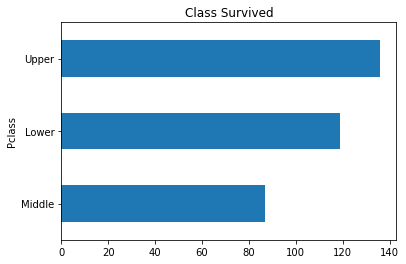

In [24]:
#visualise results
ClassSurvive = df.groupby('Pclass')['Survived'].sum().sort_values(ascending=True)
ClassSurvive.plot(kind='barh')
plt.title("Class Survived")

#Calculate percentage
dfClassSurvive = pd.DataFrame(ClassSurvive)
Percentage_upper_class = (dfClassSurvive.Survived[2] /df.Survived.sum())*100
Percentage_middle_class = (dfClassSurvive.Survived[0] /df.Survived.sum())*100
Percentage_lower_class = (dfClassSurvive.Survived[1] /df.Survived.sum())*100

#prints Percentage
print('percentage Upper class {} %'.format(Percentage_upper_class))
print('percentage Lower class {} %'.format(Percentage_lower_class))
print('percentage Middle class {} %'.format(Percentage_middle_class))

* Upper and Lower class with a high percentage of Survive percentage

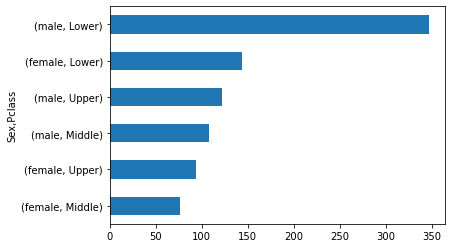

In [25]:
df.groupby(['Sex', 'Pclass'])['Survived'].count().sort_values().plot(kind='barh')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '(female, 0.0)'),
  Text(1, 0, '(female, 1.0)'),
  Text(2, 0, '(male, 0.0)'),
  Text(3, 0, '(male, 1.0)')])

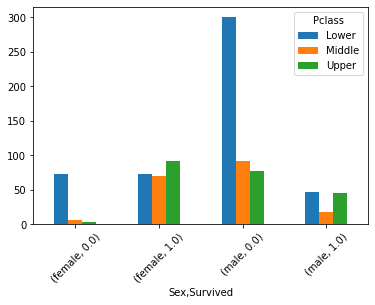

In [26]:
#visualise resualts 
pd.crosstab([df.Sex,df.Survived],df.Pclass).plot(kind='bar')
plt.xticks(rotation=45)

Average age of survivors = 28.577453680408784
Average age of not survivors = 30.4565431847231


Text(0.5, 1.0, 'Average age of survivors')

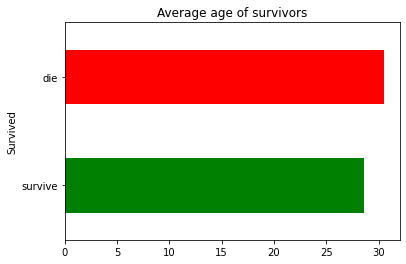

In [27]:
#print Average age
df_copy=df.copy()
df_copy.Survived = df_copy.Survived.map({1:'survive',0:'die'})
print('Average age of survivors = {}'.format(df_copy.groupby('Survived')['Age'].mean().sort_values()[0]))
print('Average age of not survivors = {}'.format(df_copy.groupby('Survived')['Age'].mean().sort_values()[1]))

#visualise relationship
df_copy.groupby('Survived')['Age'].mean().sort_values().plot(kind='barh', color=['g','r'])
plt.title('Average age of survivors')

In [28]:
display(df[["Sex", "Survived", 'Pclass']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

,Sex,Pclass,Survived
2,female,Upper,0.968085
1,female,Middle,0.921053
0,female,Lower,0.500000
5,male,Upper,0.368852
4,male,Middle,0.157407
3,male,Lower,0.135447


Text(0.5, 1.0, 'Average Survivors From Each Port of Embarkation')

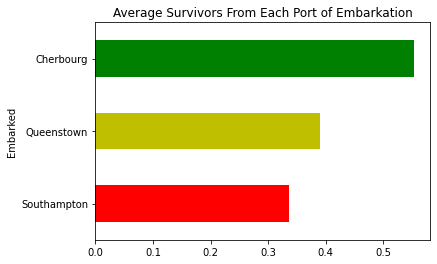

In [29]:
df_copy=df.copy()
df_copy.Embarked= df_copy.Embarked.map({'C': 'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})
df_copy.groupby('Embarked')['Survived'].mean().sort_values().plot(kind='barh', color=['r','y','g'])
plt.title('Average Survivors From Each Port of Embarkation')

Text(0.5, 1.0, 'The size of the families will be more survivors')

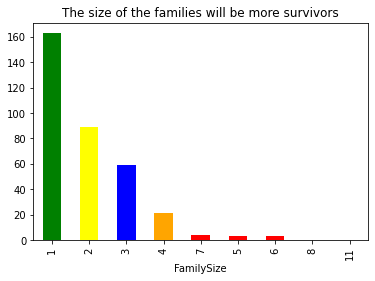

In [30]:
#visualise relationship between Family Size and Survivors
df_copy.groupby('FamilySize')['Survived'].sum().sort_values(ascending=False).plot(kind='bar', color=['green', 'yellow', 'blue', 'orange','red','red','red'])
plt.title('The size of the families will be more survivors')

* conclusion, if the size of the family increase, then the less chance of survival

### Features Correlation with Survived


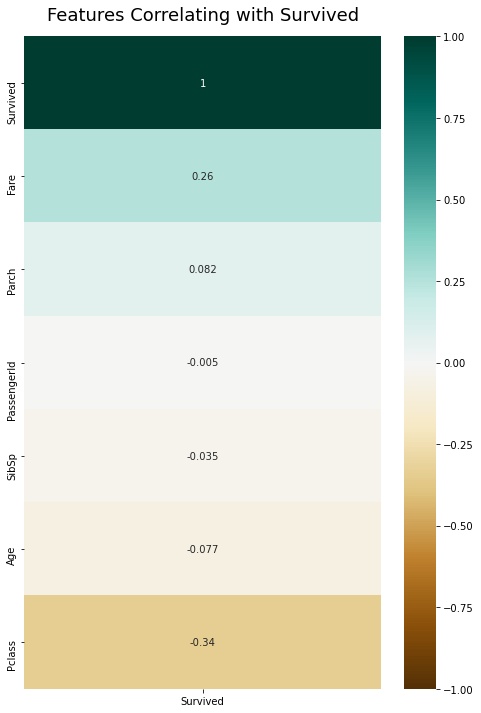

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_train.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

* Sex is positively corrlated with Survived (with a Person's correlation coefficient of 0.54), Female is more likely to survive
* Pclass is negatively correlated with Survived(with a Pearson’s correlation coefficient of -0.34) ; Obviously, better the ticket class, higher the chance of survival.

<ipython-input-32-a35ea22aa3f6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


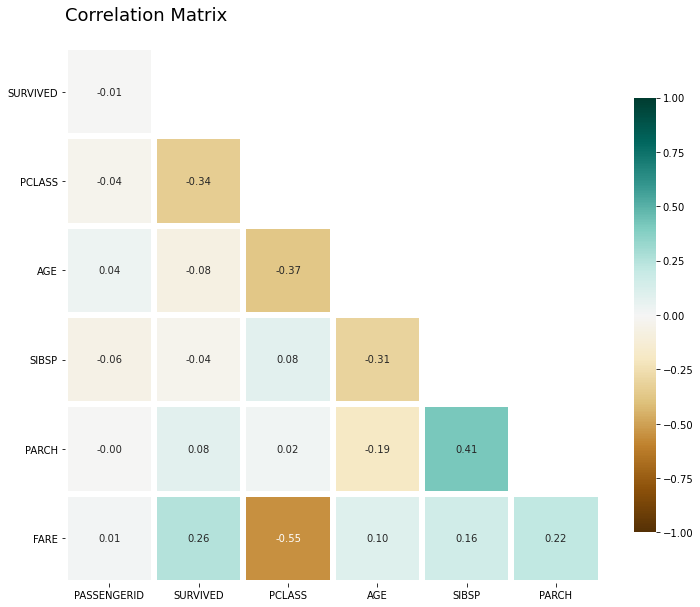

In [32]:
# get correlations
df_corr = df_train.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap='BrBG', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

### Create model Using Decision Tree..
##### First I prepare data

In [33]:
df_test.Embarked = df_test.Embarked.map({"S": 1, "C": 2, "Q": 3})
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.Sex = df_test.Sex.map({'female':1, 'male':0})
df_test.drop(['Name', 'Cabin', 'Ticket'], axis=1,inplace=True)
df_test.dropna(inplace=True)

In [34]:
df_train.Sex = df_train.Sex.map({'female':1, 'male':0})
df_train.Embarked = df_train.Embarked.map({"S": 1, "C": 2, "Q": 3})
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_train.drop(['Cabin', 'Name', 'Ticket'], axis=1,inplace=True)
df_train.dropna(inplace=True)


In [35]:
X_train = df_train.drop(["Survived"], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test #.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape ,X_test.shape

((889, 8), (889,), (418, 8))

In [36]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [39]:
y_pred = pd.DataFrame(decision_tree.predict(X_test),columns=['Survived'])

In [40]:
# Submissions
submissions = pd.concat([df_test.PassengerId,y_pred],axis=1)
submissions.to_csv('submission.csv',index=False)